# Analisis Prediktif: Prediksi Penyakit Stroke pada Manusia

*oleh: [Arkan Wijdan](https://www.dicoding.com/users/arkanwijdan)* 

*Proyek Submission 1 - Machine Learning 
Terapan Dicoding*
<center>
<img src="https://www.almazia.co/wp-content/uploads/2017/10/Data-dan-Fakta-Tentang-Stroke.jpg" align="justify">
</center>

## 1. Mengimpor pustaka/modul python yang dibutuhkan

In [1]:
# Untuk pengolahan data
from google.colab import files 
import numpy as np
import pandas as pd
from sklearn.utils import resample 
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder


# Untuk visualisasi data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Untuk pembuatan model 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

## 2. Mempersiapkan Dataset


## 2.1 Menyiapkan kredensial akun Kaggle

In [2]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arkanwijdan","key":"a75820268542c6cf797290cc1f18f0a7"}'}

In [3]:
! pip install -q kaggle

In [4]:
# Membuat folder .kaggle di dalam folder root
!rm -rf ~/.kaggle && mkdir ~/.kaggle/

# Menyalin berkas kaggle.json pada direktori aktif saat ini ke folder .kaggle
!mv kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

## 2.2 Mengunduh dan Menyiapkan Dataset
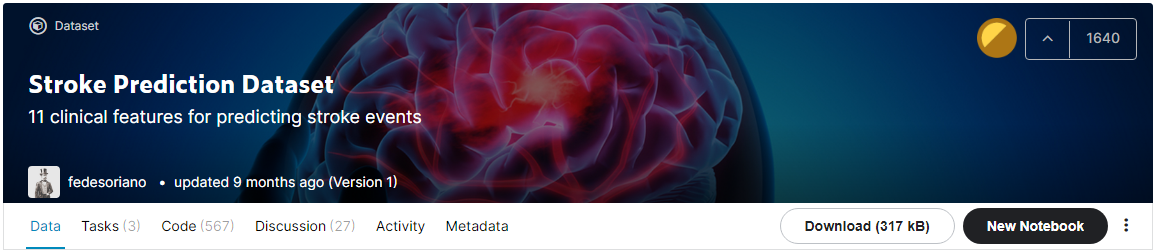

Informasi Dataset :

Jenis | Keterangan
--- | ---
Sumber | [Kaggle Dataset : Stroke Prediction Dataset](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset)
Lisensi | Data files © Original Authors
Kategori | Kesehatan, Kondisi Kesehatan, Kesehatan Masyarakat
Jenis dan Ukuran Berkas | CSV (316.97 kB)






In [5]:
# Mengunduh dataset menggunakan Kaggle CLI
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset

  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 24.8MB/s]


In [6]:
# Mengekstrak berkas zip ke direktori aktif saat ini
!unzip /content/stroke-prediction-dataset.zip

Archive:  /content/stroke-prediction-dataset.zip
  inflating: healthcare-dataset-stroke-data.csv  


## 3. Pemahaman Data (Data Understanding)


## 3.1 Memuat Data pada sebuah Dataframe menggunakan pandas

In [7]:
df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## 3.2 Keterangan kolom pada dataset

In [8]:
# Memuat informasi dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
# Menghitung jumlah data kosong pada setiap kolom
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
# Memuat ukuran shape pada dataframe
df.shape

(5110, 12)

In [11]:
# Memuat deskripsi setiap kolom dataframe
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## 3.3 Visualisasi Data

In [12]:
# membagi dataset menjadi 2 bagian yaitu kategorial dan numerik
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numerical_features = ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

### 3.3.1 Distribusi Kolom Kategorial

        jumlah sampel  persentase
Female           2994        58.6
Male             2115        41.4
Other               1         0.0


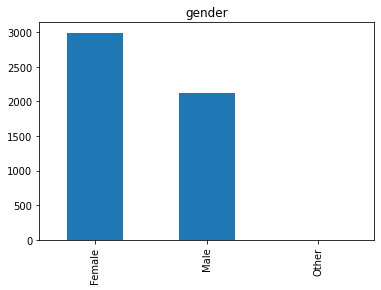

In [13]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
data = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(data)
count.plot(kind='bar', title=feature);

     jumlah sampel  persentase
Yes           3353        65.6
No            1757        34.4


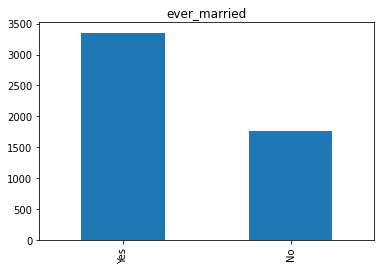

In [14]:
feature = categorical_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
data = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(data)
count.plot(kind='bar', title=feature);

               jumlah sampel  persentase
Private                 2925        57.2
Self-employed            819        16.0
children                 687        13.4
Govt_job                 657        12.9
Never_worked              22         0.4


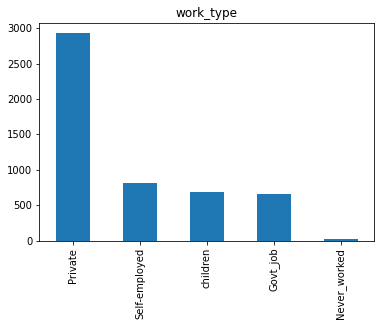

In [15]:
feature = categorical_features[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
data = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(data)
count.plot(kind='bar', title=feature);

       jumlah sampel  persentase
Urban           2596        50.8
Rural           2514        49.2


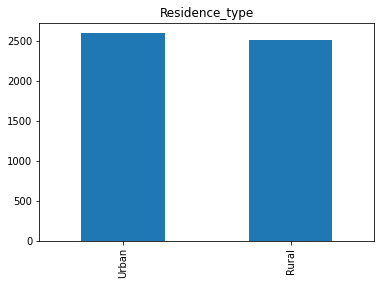

In [16]:
feature = categorical_features[3]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
data = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(data)
count.plot(kind='bar', title=feature);

                 jumlah sampel  persentase
never smoked              1892        37.0
Unknown                   1544        30.2
formerly smoked            885        17.3
smokes                     789        15.4


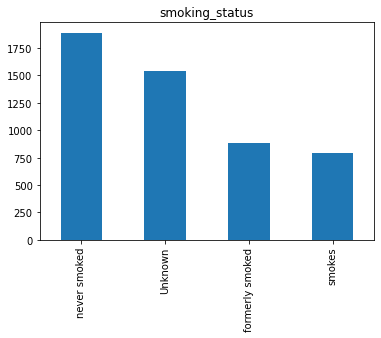

In [17]:
feature = categorical_features[4]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
data = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(data)
count.plot(kind='bar', title=feature);

### 3.3.2 Distribusi Kolom Numerik

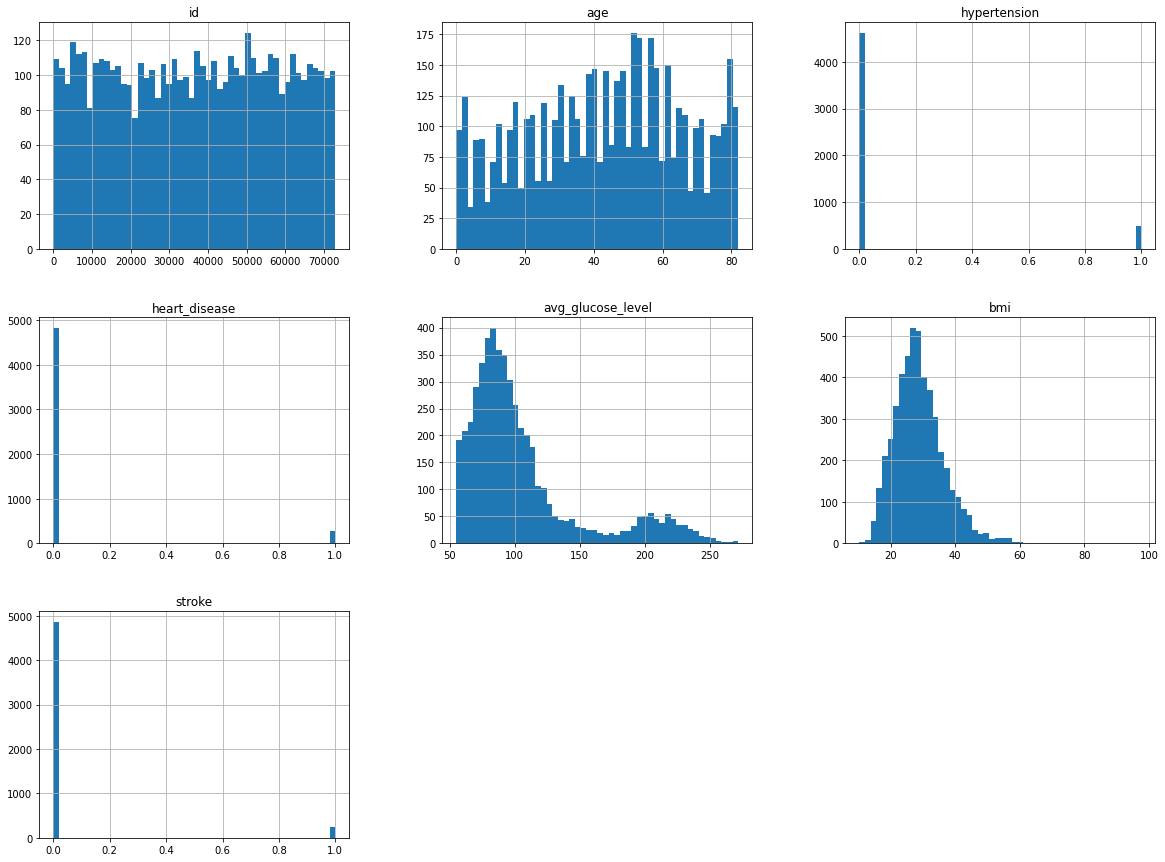

In [18]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### 3.3.2 Korelasi pada tiap kolom


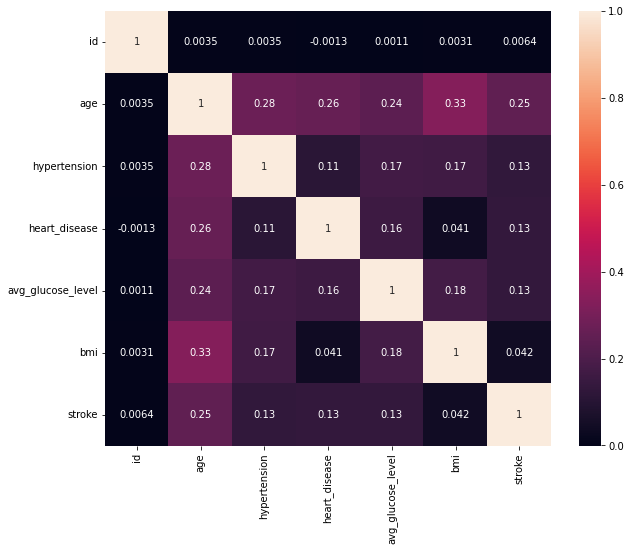

In [19]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True)

## 4. Persiapan Data (Data Preparation)

## 4.1 Drop kolom ID

In [20]:
df.drop('id', axis = 1,inplace = True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## 4.2 Mengatasi masalah data yang kosong dengan nilai rata-rata kolom (mean substitution)

In [21]:
# Nilai yang kosong pada kolom bmi akan diganti dengan nilai rata-rata pada kolom bmi
df['bmi'].fillna(df['bmi'].mean(), inplace = True)

In [22]:
# Mengecek kembali nilai yang kosong pada dataset
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## 4.3 Melakukan Encoding terhadap kolom yang bertipe object

In [23]:
print("Unique Values for Gender", df['gender'].unique())
print("Unique Values for ever_married", df['ever_married'].unique())
print("Unique Values for work_type", df['work_type'].unique())
print("Unique Values for Residence_type", df['Residence_type'].unique())
print("Unique Values for smoking_status", df['smoking_status'].unique())

Unique Values for Gender ['Male' 'Female' 'Other']
Unique Values for ever_married ['Yes' 'No']
Unique Values for work_type ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique Values for Residence_type ['Urban' 'Rural']
Unique Values for smoking_status ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


### 4.3.1 Label Encoding

In [24]:
ever_married_mapping = {'No': 0, 'Yes': 1}
df['ever_married'] = df['ever_married'].map(ever_married_mapping)

In [25]:
Residence_type_mapping = {'Rural': 0, 'Urban': 1}
df['Residence_type'] = df['Residence_type'].map(Residence_type_mapping)

### 4.3.2 One-Hot Encoding

In [26]:
onehotencoder = OneHotEncoder()

In [27]:
df['gender'] = pd.Categorical(df['gender'])
datasetDummies_gender = pd.get_dummies(df['gender'], prefix = 'gender_encoded')
datasetDummies_gender

,gender_encoded_Female,gender_encoded_Male,gender_encoded_Other
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
5105,1,0,0
5106,1,0,0
5107,1,0,0
5108,0,1,0


In [28]:
df['work_type'] = pd.Categorical(df['work_type'])
datasetDummies_work_type = pd.get_dummies(df['work_type'], prefix = 'work_type_encoded')
datasetDummies_work_type

,work_type_encoded_Govt_job,work_type_encoded_Never_worked,work_type_encoded_Private,work_type_encoded_Self-employed,work_type_encoded_children
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,1,0
...,...,...,...,...,...
5105,0,0,1,0,0
5106,0,0,0,1,0
5107,0,0,0,1,0
5108,0,0,1,0,0


In [29]:
df['smoking_status'] = pd.Categorical(df['smoking_status'])
datasetDummies_smoking_status = pd.get_dummies(df['smoking_status'], prefix = 'smoking_status_encoded')
datasetDummies_smoking_status

,smoking_status_encoded_Unknown,smoking_status_encoded_formerly smoked,smoking_status_encoded_never smoked,smoking_status_encoded_smokes
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0
...,...,...,...,...
5105,0,0,1,0
5106,0,0,1,0
5107,0,0,1,0
5108,0,1,0,0


In [30]:
# Drop kolom gender, work_type, smoking_status
df.drop("gender", axis=1, inplace=True)
df.drop("work_type", axis=1, inplace=True)
df.drop("smoking_status", axis=1, inplace=True)

In [31]:
df = pd.concat([df, datasetDummies_gender], axis=1)
df = pd.concat([df, datasetDummies_work_type], axis=1)
df = pd.concat([df, datasetDummies_smoking_status], axis=1)
df

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_encoded_Female,gender_encoded_Male,gender_encoded_Other,work_type_encoded_Govt_job,work_type_encoded_Never_worked,work_type_encoded_Private,work_type_encoded_Self-employed,work_type_encoded_children,smoking_status_encoded_Unknown,smoking_status_encoded_formerly smoked,smoking_status_encoded_never smoked,smoking_status_encoded_smokes
0,67.0,0,1,1,1,228.69,36.600000,1,0,1,0,0,0,1,0,0,0,1,0,0
1,61.0,0,0,1,0,202.21,28.893237,1,1,0,0,0,0,0,1,0,0,0,1,0
2,80.0,0,1,1,0,105.92,32.500000,1,0,1,0,0,0,1,0,0,0,0,1,0
3,49.0,0,0,1,1,171.23,34.400000,1,1,0,0,0,0,1,0,0,0,0,0,1
4,79.0,1,0,1,0,174.12,24.000000,1,1,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1,1,83.75,28.893237,0,1,0,0,0,0,1,0,0,0,0,1,0
5106,81.0,0,0,1,1,125.20,40.000000,0,1,0,0,0,0,0,1,0,0,0,1,0
5107,35.0,0,0,1,0,82.99,30.600000,0,1,0,0,0,0,0,1,0,0,0,1,0
5108,51.0,0,0,1,0,166.29,25.600000,0,0,1,0,0,0,1,0,0,0,1,0,0


## 4.4 Mengatasi masalah data tidak seimbang dengan resample

In [32]:
# Menghitung label dari kolom stroke
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [33]:
# Memilih setiap labelnya
zero  = df[df['stroke']==0]
one = df[df['stroke']==1]

In [34]:
# Melakukan resample sehingga banyak data pada label = 1
# adalah 4861
df_minority_resampled = resample(one, replace = True, n_samples = 4861)

In [35]:
# Memasukan datanya pada dataframe
df = pd.concat([zero, df_minority_resampled])

In [36]:
# Menghitung label dari kolom potability
df.stroke.value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

In [37]:
# Mengecek kembali shape pada dataset
df.shape

(9722, 20)

## 4.5 Melakukan pembagian data pada dataset dengan train_test_split

In [38]:
X = df.drop('stroke',axis=1)
y = df['stroke']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [40]:
# Mengecek jumlah baris pada data latih dan data 
print(X_train.shape)
print(X_test.shape)

(7777, 19)
(1945, 19)


## 4.6 Melakukan Standard Scaler

In [41]:
sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 5. Pembuatan Model

In [42]:
# Siapkan daraframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['RandomForest', 'KNN', 'Boosting'])

## Algoritma Random Forest

In [43]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
# Pengujian model terhadap data test
RF_pred = RF.predict(X_test)

In [45]:
accuracy_score(y_test, RF_pred)

0.9958868894601542

In [46]:
RF_cr = classification_report(y_test, RF_pred, output_dict=True)
pd.DataFrame(RF_cr).transpose()

,precision,recall,f1-score,support
0,1.000000,0.991658,0.995812,959.000000
1,0.991952,1.000000,0.995960,986.000000
accuracy,0.995887,0.995887,0.995887,0.995887
macro avg,0.995976,0.995829,0.995886,1945.000000
weighted avg,0.995920,0.995887,0.995887,1945.000000


## Algoritma K-Nearest Neighbor

In [47]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [48]:
# Pengujian model terhadap data test
KNN_pred = KNN.predict(X_test)

In [49]:
accuracy_score(y_test, KNN_pred)

0.9311053984575836

In [50]:
KNN_cr = classification_report(y_test, KNN_pred, output_dict=True)
pd.DataFrame(KNN_cr).transpose()

,precision,recall,f1-score,support
0,1.000000,0.860271,0.924888,959.000000
1,0.880357,1.000000,0.936372,986.000000
accuracy,0.931105,0.931105,0.931105,0.931105
macro avg,0.940179,0.930136,0.930630,1945.000000
weighted avg,0.939348,0.931105,0.930710,1945.000000


# 6. Evaluasi Model

## 6.1 Perbandingan metriks antara model


In [51]:
RF_cr['accuracy']

0.9958868894601542

In [52]:
# Memasukkan hasil laporan klasifikasi model pada dataframe
metrics = pd.DataFrame({'accuracy' : [RF_cr['accuracy'], KNN_cr['accuracy']],
                        'f1-score_0' : [RF_cr['0']['f1-score'],KNN_cr['0']['f1-score']],
                        'precision_0' : [RF_cr['0']['precision'],KNN_cr['0']['precision']],
                        'recall_0' : [RF_cr['0']['recall'],KNN_cr['0']['recall']],
                        'f1-score_1' : [RF_cr['1']['f1-score'],KNN_cr['1']['f1-score']],
                        'precision_1' : [RF_cr['1']['precision'],KNN_cr['1']['precision']],
                        'recall_1' : [RF_cr['1']['recall'],KNN_cr['1']['recall']]},
                        index=['RF','KNN'])
multiheader = [('','accuracy'),
               ('0', 'f1-score'),
               ('0', 'precision'),
               ('0', 'recall'),
               ('1', 'f1-score'),
               ('1', 'precision'),
               ('1', 'recall')]
metrics.columns = pd.MultiIndex.from_tuples(multiheader)
# Menampilkan dataframe
metrics

0                             1                 
     accuracy  f1-score precision    recall  f1-score precision recall
RF   0.995887  0.995812       1.0  0.991658  0.995960  0.991952    1.0
KNN  0.931105  0.924888       1.0  0.860271  0.936372  0.880357    1.0

## 6.2 Confussion Matrix

### 6.2.1 Visualisasi Algoritma Random Forest

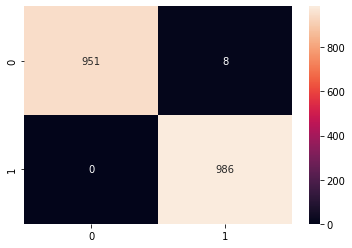

In [53]:
RF_cm = confusion_matrix(y_test,RF_pred)
sns.heatmap(RF_cm,annot=True,fmt="d")

### 6.2.1 Visualisasi Algoritma K-Nearest Neighbor

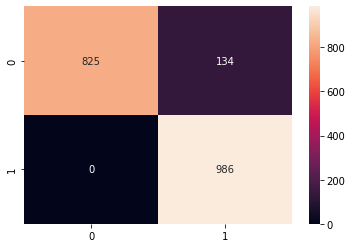

In [54]:
KNN_cm = confusion_matrix(y_test,KNN_pred)
sns.heatmap(KNN_cm,annot=True,fmt="d")

# Penutupan


Model untuk memprediksi Penyakit Stroke Pada Manusia telah selesai dibuat dan model ini dapat digunakan untuk memprediksi data sebenarnya. Namun ada beberapa tambahan untuk dikembangkan dikemudian hari seperti menggunakan algoritma lain atau menggunakan pendekatan deep learning.

### *Referensi*
*   https://github.com/fahmij8/ML-Exercise/
*   https://www.kaggle.com/fedesoriano/stroke-prediction-dataset
*   https://www.kaggle.com/bhavyamalikk/stroke-prediction-0-95-accuracy/notebook
*   https://www.kaggle.com/bariscal/stroke-entirely-ml-project-and-eda#Scores-of-Models
*   https://www.kaggle.com/milangabriel/stroke-eda-prediction-96-accuracy#4.-Feature-Engineering
*   https://www.kaggle.com/kadirduran/stroke-prediction-with-knn#Data-Preparation

